In [4]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
library(pheatmap)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "results.summary.Merge.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_crispr_stats = dat
print(dim(dat))
head(dat)

Rows: 3084 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Peak, Gene
dbl (7): Mean, Median, Max, Min, Count, Mean_Neg, Mean_Pos

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 3084    9


Peak,Gene,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_33065336_33066228,CAPRIN1,-0.27343935,-0.2533300,1.82911,-2.32196,46,-0.5695431,0.4782085
chr11_33065336_33066228,CAT,-0.01256696,-0.1384765,1.43868,-1.77410,46,-0.5122241,0.6369873
chr11_33065336_33066228,LMO2,0.03675483,-0.0071000,1.09905,-1.14702,46,-0.4276747,0.5011843
chr11_33068519_33069100,CAPRIN1,-0.11785479,-0.0847600,1.64429,-2.01338,53,-0.4252182,0.4797963
chr11_33068519_33069100,CAT,-0.15932204,-0.1697360,2.12211,-2.59035,53,-0.6266582,0.6769637
chr11_33068519_33069100,LMO2,-0.08303026,-0.1090310,2.73010,-2.25265,53,-0.5389359,0.5116293


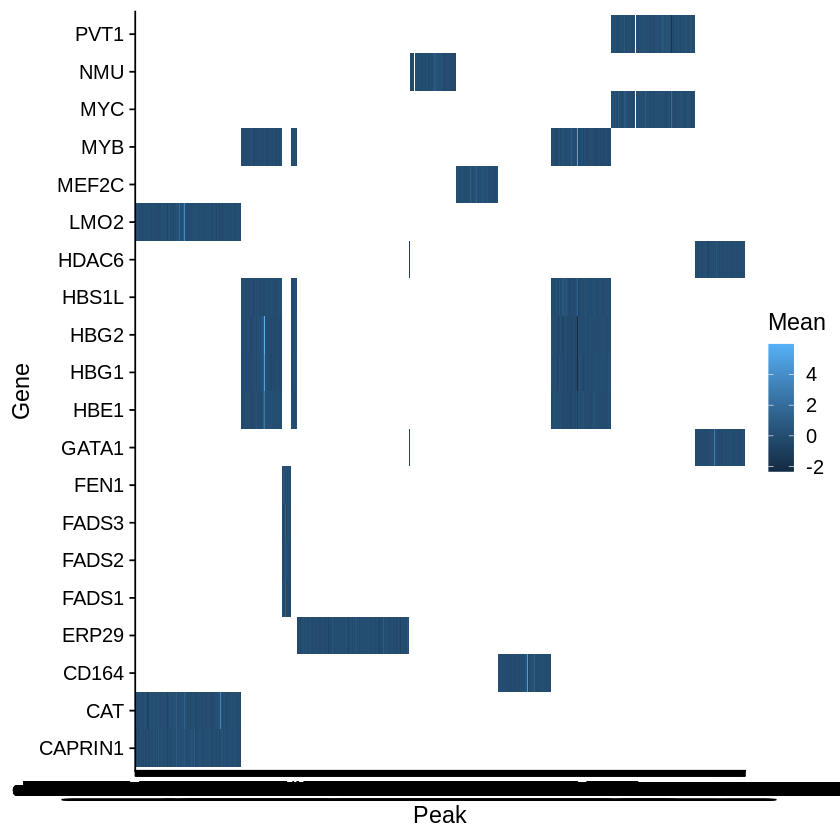

In [3]:
dat = dat_peak_crispr_stats
gpt = ggplot(dat, aes(x=Peak, y=Gene, fill=Mean)) +
    geom_tile() +
    theme_cowplot()

print(gpt)

In [16]:
GENES = c(
    "NMU",
    "MEF2C",
    "CD164",
    "MYB", "HBS1L", "HBG1", "HBG2", "HBE1",
    "PVT1", "MYC",
    "LMO2", "CAPRIN1", "CAT",
    "FADS1", "FADS2", "FADS3", "FEN1",
    "ERP29",
    "GATA1", "HDAC6"
)

CHROMS = paste0("chr", c(1:22, "X", "Y"))

In [20]:
dat = dat_peak_crispr_stats
summary(dat)

     Peak               Gene                Mean               Median        
 Length:3084        Length:3084        Min.   :-2.327500   Min.   :-2.62292  
 Class :character   Class :character   1st Qu.:-0.128081   1st Qu.:-0.14676  
 Mode  :character   Mode  :character   Median :-0.037360   Median :-0.05033  
                                       Mean   : 0.007023   Mean   :-0.01039  
                                       3rd Qu.: 0.064562   3rd Qu.: 0.05159  
                                       Max.   : 5.978311   Max.   : 6.30305  
      Max              Min             Count           Mean_Neg      
 Min.   :-1.610   Min.   :-7.084   Min.   :  1.00   Min.   :-2.4879  
 1st Qu.: 1.165   1st Qu.:-2.001   1st Qu.: 20.00   1st Qu.:-0.6258  
 Median : 1.635   Median :-1.546   Median : 38.50   Median :-0.5321  
 Mean   : 1.836   Mean   :-1.651   Mean   : 57.22   Mean   :-0.5493  
 3rd Qu.: 2.232   3rd Qu.:-1.177   3rd Qu.: 70.00   3rd Qu.:-0.4541  
 Max.   :13.338   Max.   : 2.053  

In [17]:
dat = dat_peak_crispr_stats

###
dat = dat %>% 
    dplyr::select(Peak, Gene, Mean) %>%
    tidyr::spread(Gene, Mean) %>% 
    dplyr::mutate(across(where(is.numeric), ~replace_na(.,0))) %>%
    tidyr::separate(Peak, c("Chrom", "Start", "End"), remove = FALSE) %>%
    dplyr::select(Peak, Chrom, Start, End, !!genes)

### sort by location
dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, Start, End)

### split into score matrix and annotatoin
dat_annot = dat %>% dplyr::select(Peak, Chrom)          %>% column_to_rownames(var = "Peak")
dat_score = dat %>% dplyr::select(-Chrom, -Start, -End) %>% column_to_rownames(var = "Peak")


head(dat)

Peak,Chrom,Start,End,NMU,MEF2C,CD164,MYB,HBS1L,HBG1,⋯,LMO2,CAPRIN1,CAT,FADS1,FADS2,FADS3,FEN1,ERP29,GATA1,HDAC6
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr3_128486843_128489642,chr3,128486843,128489642,0.00000000,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.260774,-0.137354
chr4_55270087_55270436,chr4,55270087,55270436,-0.08950373,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr4_55293902_55294193,chr4,55293902,55294193,-0.08497190,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr4_55296965_55297999,chr4,55296965,55297999,-0.34007295,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr4_55312019_55312784,chr4,55312019,55312784,0.21455504,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr4_55320601_55320848,chr4,55320601,55320848,-0.31725524,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000


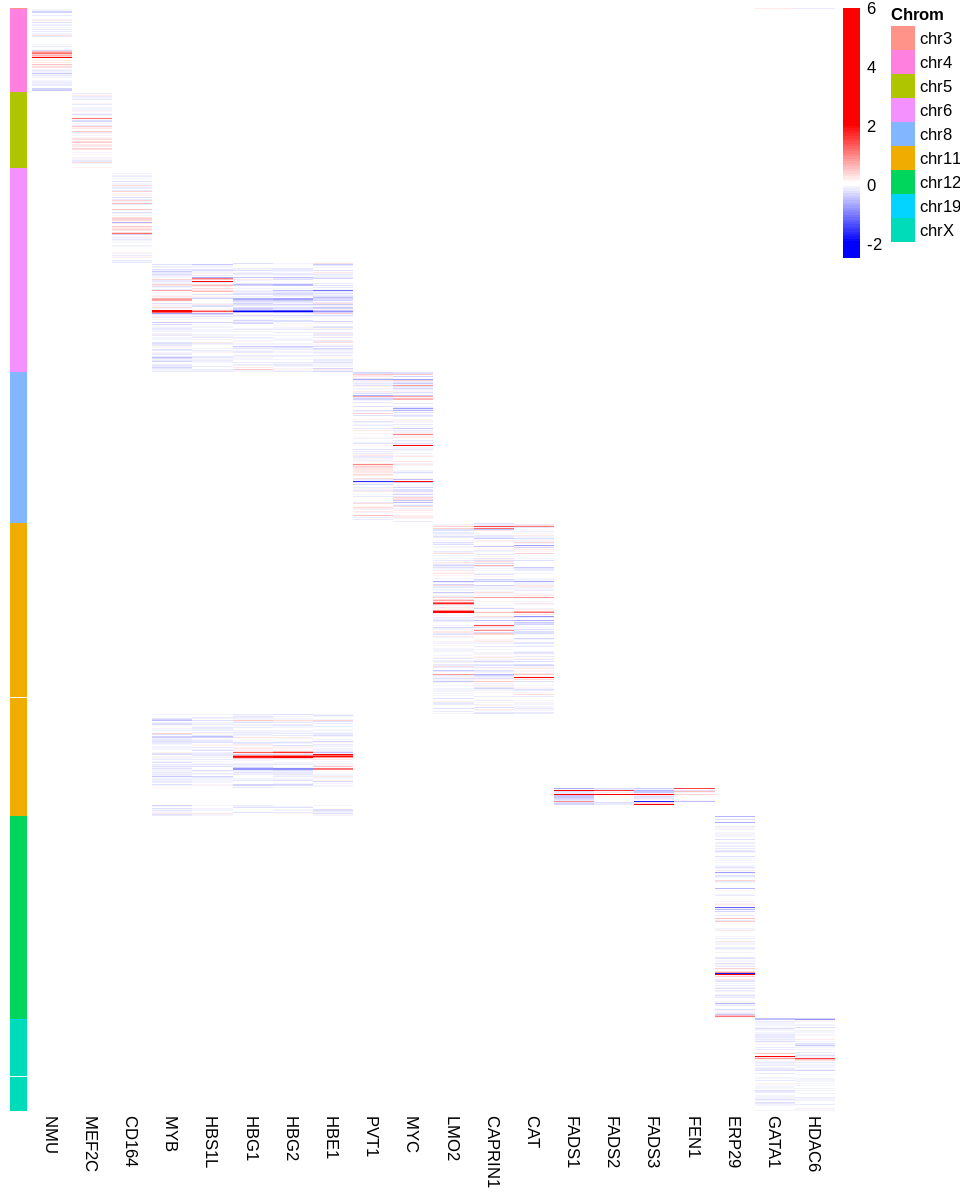

In [19]:
###
paletteLength = 50
mat  = dat_score
bmin = -2.5
bmax =  6
xmin = -2 # min(mat)
xmax =  2 # max(mat)
nmin = ceiling((paletteLength-1)/2)
nmax = floor(  (paletteLength-1)/2)

myColor = c(
    "blue",
    colorRampPalette(c("blue", "white"))(nmin),
    "white",
    colorRampPalette(c("white", "red"))(nmax),
    "red"
)

myBreaks = c(
    bmin,
    seq(xmin, xmin/paletteLength, length.out=nmin),
    0,
    seq(xmax/paletteLength, xmax, length.out=nmax),
    bmax
)

options(repr.plot.height=10, repr.plot.width=8)
pheatmap(mat,
         cluster_row  = FALSE,
         cluster_cols = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot,
         color=myColor, 
         breaks=myBreaks)